# Titanic Machine Learning Case Study
**Author:** Edgardo Morales Silva  
**Date:** Sep 03, 2024

## Introduction
This notebook contains a try of the Titanic dataset for a machine learning exercise as part of a Job application towards Rise MKT. 
The goal is to predict survival outcomes based on various passenger attributes.
The following approach for solving the Titanic connundrum has been approached with the R programming language.
This notebook is meant for Samuel Hamilton (SHAMILTON@quad.com) & José Miguel (JMIGUEL@meetrise.com).

**Key Evaluation Points To Solve The Titanic Problem:**
1. Data Wrangling
2. Data Visualization
3. Machine Learning Modeling
4. Evaluation of Results

## Libraries Setup
The following libraries are needed for data manipulation, visualization, and machine learning modeling:

In [1]:
#libraries we will need
library(tidyverse)
library(visdat)
library(dplyr)
library(fastDummies)
library(randomForest)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




## Data Loading and Initial Exploration

We begin by loading the **train** and **test** datasets and combining them for ease of manipulation.

In [2]:
#read and assign names to our datasets
t.train <- read.csv("train.csv", stringsAsFactors = FALSE)
t.test <- read.csv("test.csv", stringsAsFactors = FALSE)

#its good practice to check for missing values and cleaning data first before doing anything funny with it, so let's combine both datasets
#we need to distinguish the train dataset from the test dataset to make sure we don't mix them up by accident
#but first we need to make sure they have the same number of columns (and their names match) so rbind works proper
#the test dataset does not have the Survive column so we'll add it full of NA values (418 of them)

# Add Survived column to test dataset
t.test$Survived <- NA
#check that it was added proper
summary(t.test)
#we see the column now, but just to be sure...
ncol(t.test)
ncol(t.train)
#now we distinguish between them
t.test$DS <- "TEST"
t.train$DS <- "TRAIN"

# Combine the datasets
t.combined <- rbind(t.test, t.train)

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

[1] 12

[1] 12

In [3]:
#simple check of both head and tail to make sure nothing went funky #again
head(t.combined)
tail(t.combined)
summary(t.combined)

#Saving the combined data to read it as well
write.csv(t.combined,"combined1.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,DS
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,NA,TEST
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,NA,TEST
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,NA,TEST
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,NA,TEST
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,NA,TEST
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,NA,TEST


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,DS
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
1304,886,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q,0,TRAIN
1305,887,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S,0,TRAIN
1306,888,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S,1,TRAIN
1307,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S,0,TRAIN
1308,890,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C,1,TRAIN
1309,891,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q,0,TRAIN


  PassengerId       Pclass          Name               Sex           
 Min.   :   1   Min.   :1.000   Length:1309        Length:1309       
 1st Qu.: 328   1st Qu.:2.000   Class :character   Class :character  
 Median : 655   Median :3.000   Mode  :character   Mode  :character  
 Mean   : 655   Mean   :2.295                                        
 3rd Qu.: 982   3rd Qu.:3.000                                        
 Max.   :1309   Max.   :3.000                                        
                                                                     
      Age            SibSp            Parch          Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.000   Length:1309       
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000   Class :character  
 Median :28.00   Median :0.0000   Median :0.000   Mode  :character  
 Mean   :29.88   Mean   :0.4989   Mean   :0.385                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000                     
 Max.   :80.00   Max.   :8

In [4]:
#we can see both TEST and TRAIN on the DS fields and Survived shows us 418 NA's (the test # of entries), so we're good.
#now we need to decide what to do with the missing data (and there is a lot)...

PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0          NA           0 
      Parch      Ticket        Fare       Cabin    Embarked    Survived 
          0           0          NA        1014           2          NA 
         DS 
          0 
PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0         263           0 
      Parch      Ticket        Fare       Cabin    Embarked    Survived 
          0           0           1           0           0         418 
         DS 
          0 


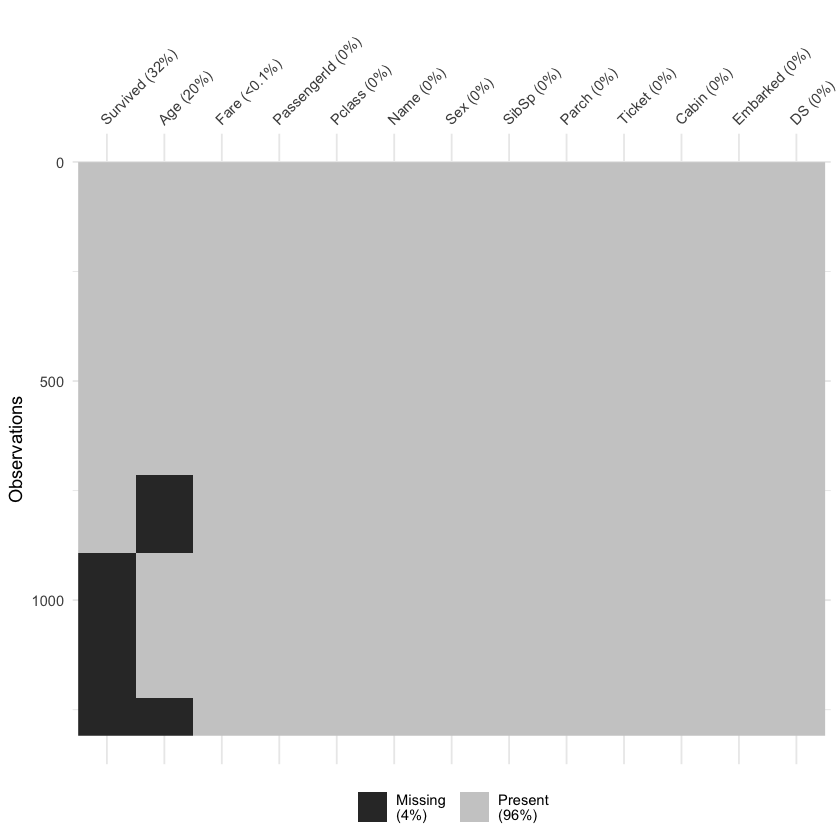

In [5]:
# Checking for missing data, with blank fields and with na's
blanks_missing <- sapply(t.combined, function(x) sum(x == ""))
nas_missing <- sapply(t.combined, function(x) sum(is.na(x)))

print(blanks_missing)
#age, fare and survived had missing data as na's, we can ignore survived for now. It also has 1014 cabin missing entries and 2 from embarked
print(nas_missing)
#Age has 263 NA's, Fare has 1
#So basically we have missing information on Age, Fare, Cabin and Embarked
#We can utilize some r libraries like vis_miss to create graphic visualizations of missing data
vis_miss(t.combined, sort_miss = TRUE, cluster = TRUE)
#It is organized 


The data presented with vis_miss "clusters" together in missing and in not missing. 4% of all of our data is missing, with specific breakdowns on it's categories presented at the top as well.
We can try and find some sense into this data, by using a correlation plot and seeing if anything pops out for us, so we can best proceed.
The vis_cor function gives us an error if we try to just send the dset to it, so we need to give it only numeric values, we create a small function that exclusively retrieves those, but before we can use vis_dat to check what types of data we've got.

## Correlation Analysis
Next, we look at correlations between numerical features to gain insights into the relationships between variables and the target.

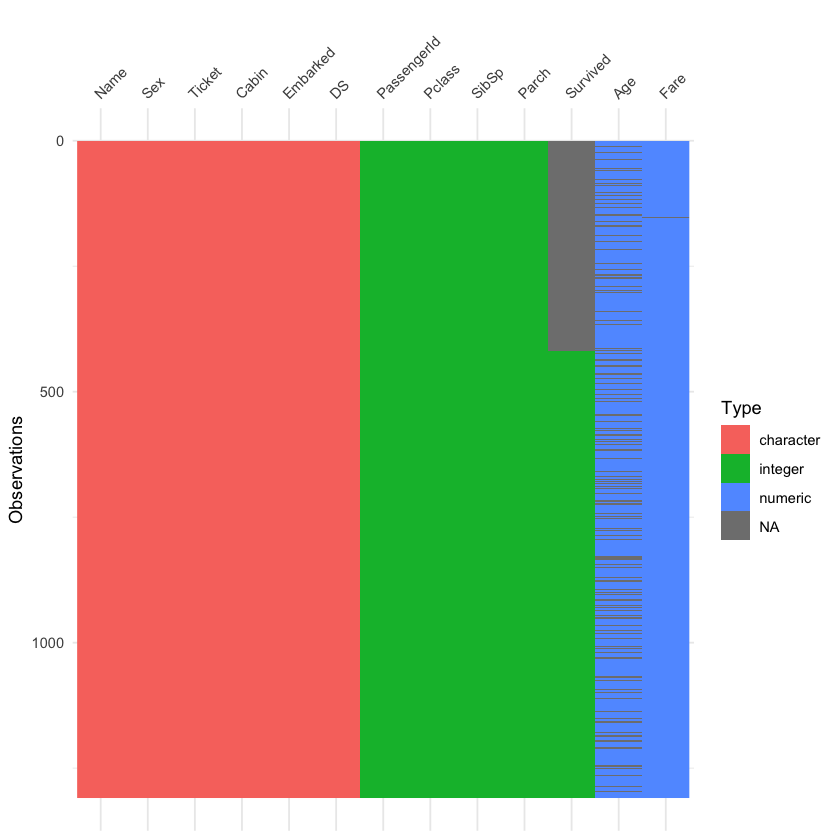

In [6]:
vis_dat(t.combined, sort_type = TRUE)

comb_num <- t.combined[sapply(t.combined,is.numeric)]

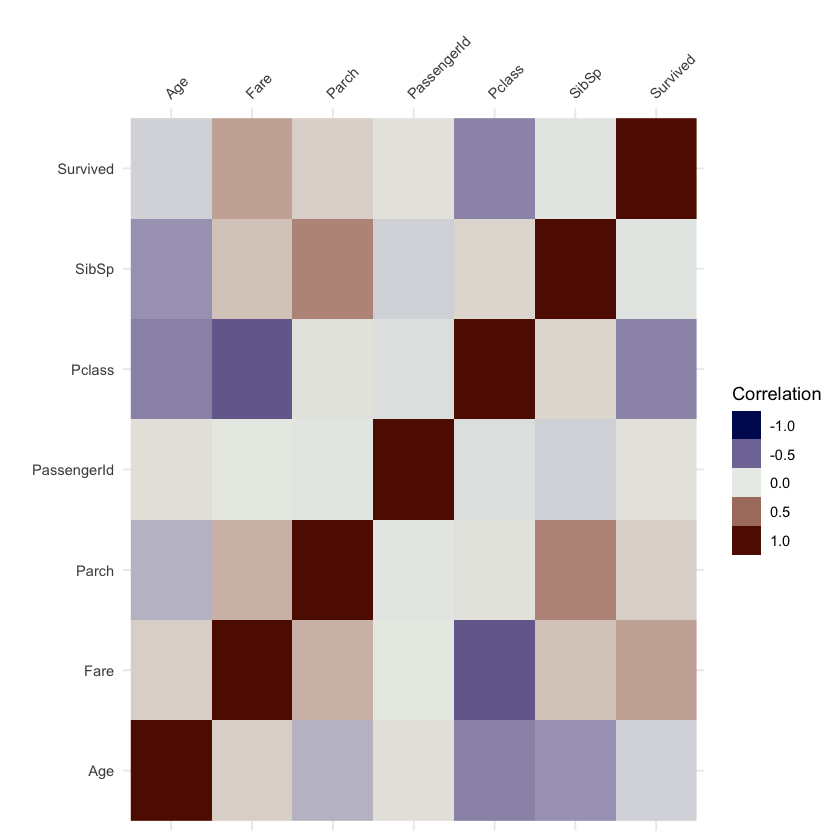

In [7]:
#and send, na_action is telling the function to only review complete rows, ignore na's, which for practical purposes, means mostly ignoring the test data that did not have a Survived column and that we ourselves populated with NA's
vis_cor(comb_num, na_action = "complete.obs")

In [8]:
#Now we have a graphic visualization of the correlations between our numeric entries, but using data_vis_cor with the same arguments we can go further and get the raw numbers of it (As it appears that vis_cor has no easy way to just plot the numbers on top of each comparison)
correlation_data <- data_vis_cor(comb_num, na_action = "complete.obs")
#And save it somewhere
write.csv(correlation_data, "correlation_data.csv")

### Correlation Analysis of Survival Factors

Focusing first on **Survived**, we can see that it has a strong negative correlation with **Pclass**, meaning that the higher the **Pclass** number, the lower the chance of survival. In simple terms: lower-class passengers were less likely to survive.

**Survived** also has a strong positive correlation with **Fare**, indicating that higher fares were associated with a higher chance of survival. This correlates with the common understanding that higher-class passengers most likely paid higher fares.

From this first relationship, we can tentatively infer: **higher-class passengers were more likely to survive**. While this seems reasonable, it's important to validate this statement with additional data before jumping to conclusions driven by class bias.

The next two most important relationships for **Survived** are with **Parch** and **Age**. **Parch** represents the number of parents/children aboard the Titanic for a given passenger, while **Age** is self-explanatory. These relationships are weaker, and the narrative is less clear-cut. For **Age**, there is a possible connection to the "Mothers and children first" principle, but we need data to prove whether this happened or if it's just a Hollywood invention.

One glaring omission in our dataset at this point is the **Sex** of passengers. We have only included numeric variables so far, but **Sex** could be a key factor in determining survival chances ("Mother and children first" again...). However, before we address **Sex**, let's finish reviewing the current correlations.

As we review the full dataset, a series of correlations (taking into account values higher or lower than 0.1 or -0.1, respectively) begins to emerge. Most notably:

- **Passenger Class** has strong negative correlations with **Survived**, **Age**, and **Fare**. This suggests that higher-class passengers were more likely to survive, were older, and paid more for their tickets.
- **Age** has strong negative correlations with **Siblings/Spouses**, **Parents/Children**, and **Passenger Class**. This indicates that older passengers were more likely to be in higher classes, had company, and were likely parents. If they were younger, they tended to be in family situations.
- **Siblings/Spouses** and **Parents/Children** are positively correlated with each other, providing hints about family arrangements. Both also have positive correlations with **Fare**, suggesting that families may have paid higher ticket prices.

### Our first insights:

From this, we can propose the following assumptions:

- **Higher-class passengers** likely paid higher fares, were older, and were more likely to survive. However, it's important to note that just because older passengers were skewed toward higher-class categories doesn't necessarily mean all older passengers were more likely to survive.
- **Lower-class passengers** paid lower fares, were typically younger, and had significantly lower chances of survival. While there were families in third class, the weaker correlations suggest that many passengers were either traveling alone or in smaller groups compared to wealthier families in higher classes.


Now, let's get sex into the equation.
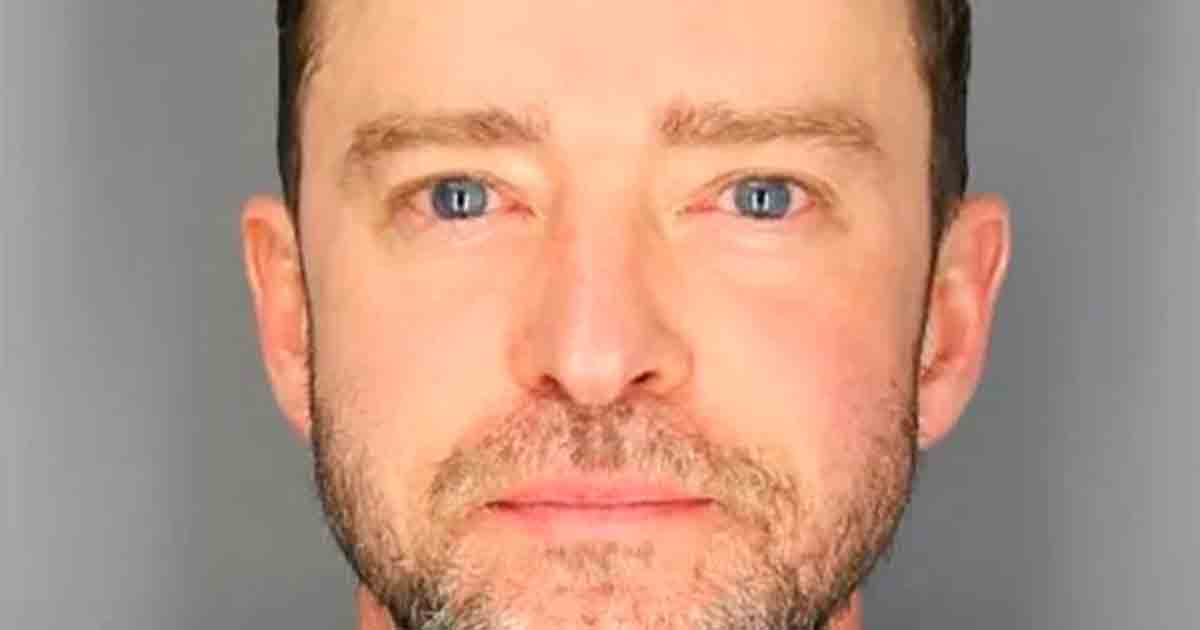

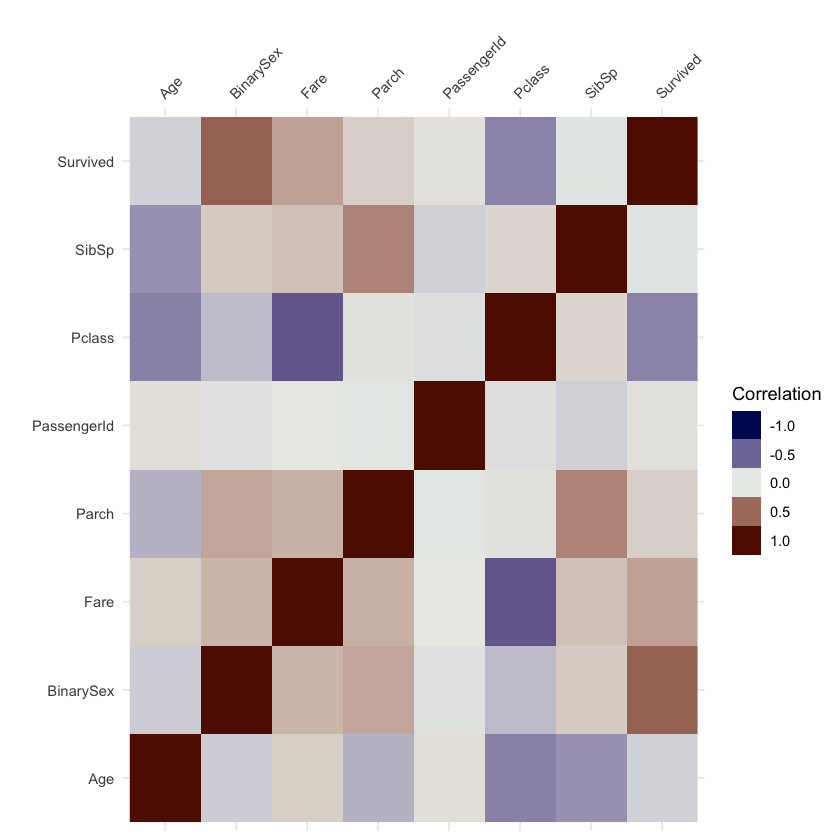

In [10]:
#Let's convert sex into binary values, we'll use 1 for Female, 0 for Male
t.combined$BinarySex <- ifelse(t.combined$Sex == "female",1,0)
#We send once again our values to our numeric dset, generate correlation matrix, save the raw data somewhere...
comb_num <- t.combined[sapply(t.combined,is.numeric)]
vis_cor(comb_num, na_action = "complete.obs")
correlation_data_sex <- data_vis_cor(comb_num, na_action = "complete.obs")
write.csv(correlation_data_sex,"correlation_data_sex.csv")

We notice right away that Sex has a strong positive correlation with Survived, Parents/Children, and Fare. A slight one with Siblings/Spouses and a medium negative one with Class. That can translate into:
Females were more likely to survive, they were also more likely to be traveling in family arrangements and there was a slight chance that they were of higher class than men, but it's not as significant overall.

Now we have an idea of what arguments we can make for our data, so it's time to figure out how to calculate the missing values.
Beginning with Age, we have two strong indicators for it: Passenger Class and Sex, older passengers were more likely to be in higher classes and females were younger on average overall, so if a Passenger is of higher class and male, we can assume he's "old", and if he's higher class and female, young. Etc. We'll group them by these two groups, get the median and then pop those values back into our dataset.
We know that right now we have 263 NA's in Age

## Handling Missing Values
We will handle missing values by imputing based on existing data. We begin by filling missing values for Age, Embarked, and Fare.

### Age:

In [20]:
#Create the function to store our values, from our combined dset group the values by Class and Sex, then using summarize we create a new column where we'll store those values after analizing those groups
age_medians <- t.combined %>%
  group_by(Pclass, Sex) %>%
  summarise(MedianAge = median(Age, na.rm = TRUE))
#Print that baby and save it somewhere
print(age_medians)
write.csv(age_medians,"age_medians.csv")

`summarise()` has grouped output by 'Pclass'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
# Groups:   Pclass [3]
  Pclass Sex    MedianAge
   <int> <chr>      <dbl>
1      1 female      36  
2      1 male        42  
3      2 female      28  
4      2 male        29.5
5      3 female      22  
6      3 male        25  


In [21]:
#This analysis gave us 6 categories, 3 Pclases and 2 sexes. Now we're going to evaluate all of our original 1300+ entries against it to make sure we "place" them in somewhere with this info
t.combined <- t.combined %>%
  #T.combined is gonna be both the source and the destination of this...
  #left join will join age_medians and our t.combined datasets by matching the groupings that we give it and changing the missing data (or leaving it be if it's there) accordingly
  left_join(age_medians, by = c("Pclass","Sex")) %>% 
  mutate(Age = ifelse(is.na(Age),MedianAge,Age)) %>% 
  #byebye MedianAge you were a good column
  select(-MedianAge)
#Check if we still got NA's...
sum(is.na(t.combined$Age))

[1] 0

Success!

### Embarked:

In [16]:
#Now we only have missing data on Cabin, Fare and Embarked
#Let's begin with Embarked, that is a Categorical data with (as far as we know) only 3 possible values, Cherbourg, Queenstown, and Southampton, we cnn use the mode or the most "popular" value to get it out of the way without much of a hassle
#We can simply use the table function to check which are the category entries in our column and then replace the 2 missing ones from there
table(t.combined$Embarked)



  C   Q   S 
270 123 916 

In [22]:
#S appears to be where the overwhelming majority of people came, so let's just go ahead and also group them up
t.combined <- t.combined %>% 
  mutate(Embarked = ifelse(Embarked == "", "S", Embarked))
#And check...
table(t.combined$Embarked)



  C   Q   S 
270 123 916 

Success!

Now we're only missing values in Fare and in Cabin*. Let's deal with Fare first, as Cabin could have several asterisks (And since this is a real case we're gonna cheat and investigate what the rules for that were to understand why it might be missing and why it might not be in our best interest to just go ahead and extrapolate it from something else)


### Fare, how much a dollar cost?

Fare is a monetary value, we can reasonably assume that it might be related to the Passenger class, since it's likely that higher prices reflected higher class tickets. But having embarked, let's analize the correlations between data too, is there a correlation between how much was paid and where from somebody boarded the ship?


In [23]:
#Transform Embarked into data values, 1 2 3 in alphabetical order will be enough
t.combined <- t.combined %>% 
  mutate(EmbarkedNum = case_when(
    Embarked == "C" ~ 1,
    Embarked == "Q" ~ 2,
    Embarked == "S" ~ 3 
  ))

In [24]:
#Check...
table(t.combined$EmbarkedNum)


  1   2   3 
270 123 916 

#Success!

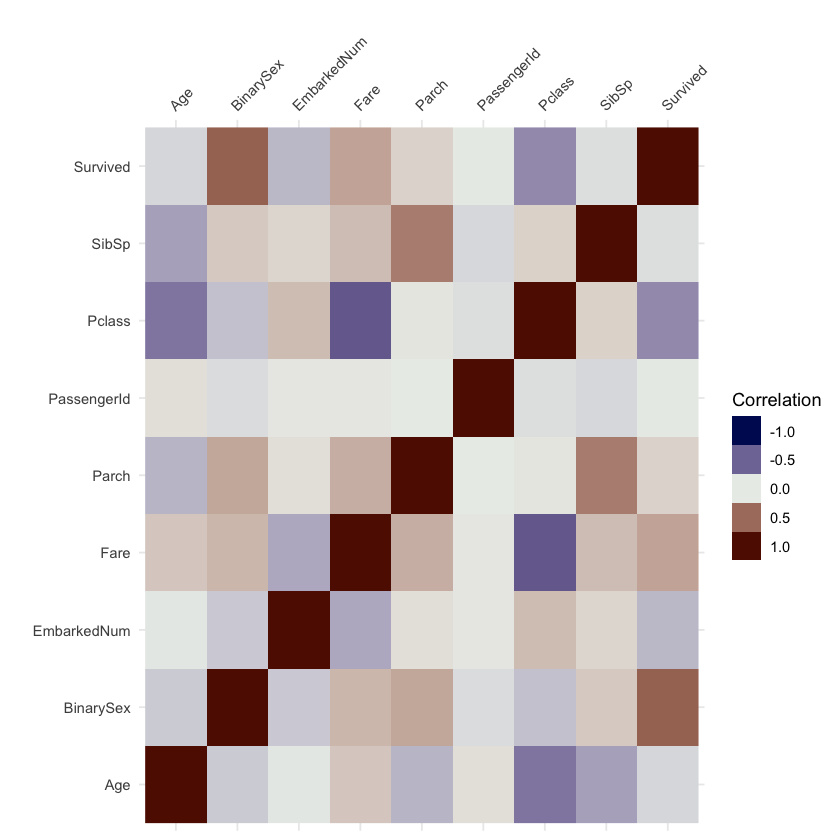

In [25]:
#Now let's run the correlation matrix once again, and important to note, now we have a complete set of Age Values, maybe there's some changes...
comb_num <- t.combined[sapply(t.combined,is.numeric)]
vis_cor(comb_num, na_action = "complete.obs")
correlation_data_Embarked <- data_vis_cor(comb_num, na_action = "complete.obs")
write.csv(correlation_data_Embarked,"data_Embarked.csv")

Reading our data matrix, once again we notice 3 interesting relationships: Fare is a strong negative one, which means that the more somebody paid the more likely that their Embarkednum was 1, and viceversa. Alongside that, Survived is also a negative one, tho somewhat weaker, so we could perhaps inferr that EmbarkedNum 1 had a little bit more chance to survive. Pclass is weak but positive so the higher EmbarkedNum represented a higher (relative, again, still low) chance of having High Class Passengers board up. Now, this might seem like overwill since we're only missing 1 Fare value. But it's probably a reasonably annd more importantly, consistent (internally) approach. We're gonna group up EmbarkedNum and PClass since both appear to be our strongest bets.

We use median again because as we might have seen before, higher fares could have some outliers due to families, not necesarily class related...

In [27]:
fare_medians <- t.combined %>%
  group_by(Pclass, EmbarkedNum) %>%
  summarise(MedianFare = median(Fare, na.rm = TRUE))
#Print that baby and save it somewhere
print(fare_medians)
write.csv(fare_medians,"Fare_medians.csv")

`summarise()` has grouped output by 'Pclass'. You can override using the
`.groups` argument.


# A tibble: 9 × 3
# Groups:   Pclass [3]
  Pclass EmbarkedNum MedianFare
   <int>       <dbl>      <dbl>
1      1           1      76.7 
2      1           2      90   
3      1           3      52   
4      2           1      15.3 
5      2           2      12.4 
6      2           3      15.4 
7      3           1       7.90
8      3           2       7.75
9      3           3       8.05


In [29]:
t.combined <- t.combined %>%
  left_join(fare_medians, by = c("Pclass","EmbarkedNum")) %>% 
  mutate(Fare = ifelse(is.na(Fare),MedianFare,Fare)) %>% 
  select(-MedianFare)
#Simple check...
sum(is.na(t.combined$Fare))

[1] 0

Success

### Cabins && Decks...

Cabin has been somewhat of a black sheep so far, we have a couple things in mind. 

1. According to this website https://www.encyclopedia-titanica.org/cabins.html we can inferr that Cabins were named after the deck they were on. We're gonna ignore the fact that the names and real relationships of who was were is presented there, we're only consulting it to understand the key behind the alphabetical cabin numbers.


2. It's reasonable to assume that decks were likely ordered by class, ticket price and that passengers were mostly gonna be with their families (understanding Family as short hand for all relationships including spouses / husbands / children / mothers / fathers, etc).


3. It's reasonable and sound to assume that the location of those cabins also probably had some effect in their survivability, so all of this will be useful to eventually arrive at our final answers.


With those assumptions we're gonna do the following: 

Group people with their families.

Fill all the missing values in the Cabin entries, then extract the first letter to consider it as shorthand for Deck, transform those values into a correlation matrix and figure out any correlations, then, just like Fare, Age and the likes, we're gonna try and reasonably 'assign' the unknowns somewhere based on whichever correlations seem more appropiate.

In [30]:
t.combined <- t.combined %>% 
  mutate(Cabin = ifelse(Cabin == "", "Unknown", Cabin))
#A simple check, we should have 1014 unknowns
table(t.combined$Cabin)


            A10             A11             A14             A16             A18 
              1               1               1               1               1 
            A19             A20             A21             A23             A24 
              1               1               1               1               1 
            A26             A29             A31             A32             A34 
              1               1               1               1               3 
            A36              A5              A6              A7              A9 
              1               1               1               1               1 
            B10            B101            B102             B11             B18 
              1               1               1               1               2 
            B19             B20             B22             B24             B26 
              1               2               2               1               1 
            B28            

In [31]:
#Now, let's substract the first letter of the cabins and consider it our deck data
t.combined$Deck <- ifelse(t.combined$Cabin == "Unknown", "U", substr(t.combined$Cabin, 1, 1))
#Check it...
table(t.combined$Deck)


   A    B    C    D    E    F    G    T    U 
  22   65   94   46   41   21    5    1 1014 

In [33]:
#According to the Encyclopedia Titanica (Previously referenced website), the titanic had decks from A to G and several special cabins for the captain and the likes we're placed in other non-named decks, so we're making sense right now...
#Now, let's just assign some numeric values to our Decks to sent them to our correlation matrix
t.combined <- t.combined %>% 
  mutate(DeckNum = case_when(
    Deck == "A" ~ 1,
    Deck == "B" ~ 2,
    Deck == "C" ~ 3,
    Deck == "D" ~ 4,
    Deck == "E" ~ 5,
    Deck == "F" ~ 6,
    Deck == "G" ~ 7,
    Deck == "T" ~ 8,
    Deck == "U" ~ 9
  ))
#quick check...
table(t.combined$DeckNum)


   1    2    3    4    5    6    7    8    9 
  22   65   94   46   41   21    5    1 1014 

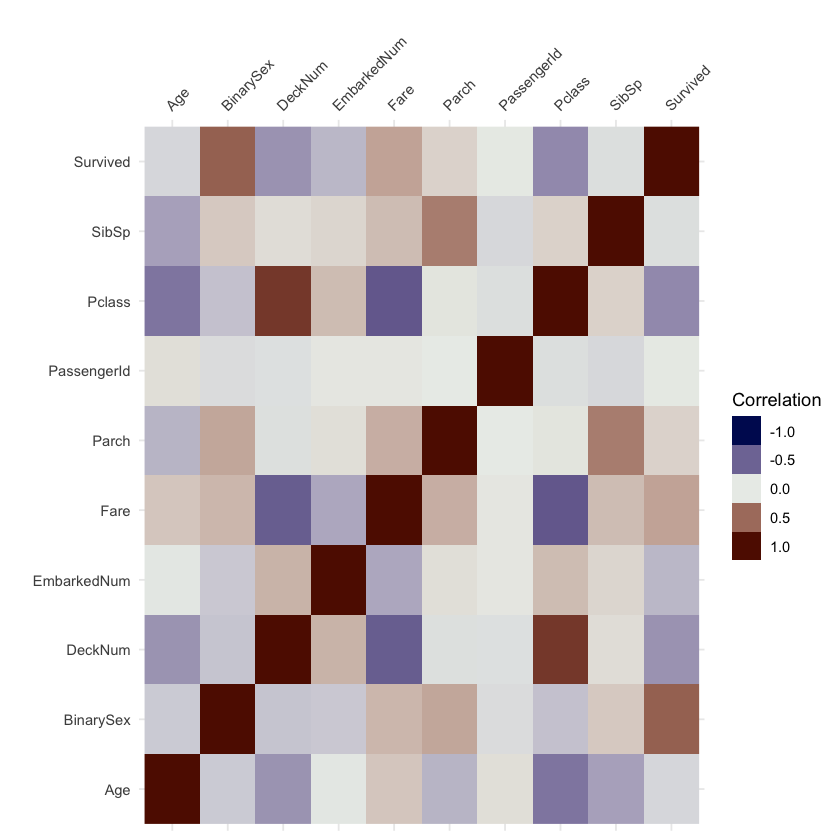

In [34]:
#Let's correlation matrix the decks and see where that leads us
comb_num <- t.combined[sapply(t.combined,is.numeric)]
vis_cor(comb_num, na_action = "complete.obs")
correlation_data_decks <- data_vis_cor(comb_num, na_action = "complete.obs")
write.csv(correlation_data_decks,"correlation_data_decks.csv")

With the data in hand, two correlations jump at us directly: Fare and Class, they both tell us the same story, higher fares (or higher classes) were more likely to have lower deck numbers, or alphabetically, were closer to Deck A. Thus we can pressume that Deck A was reserved for the creme de la creme, and the lower in the alphabet you went, the more likely it was a lower class passenger assigned to those decks.

### Families

Let's explore family groupings. For now let's just say hey, was this person in a family or no? By counting anything higher than 0 from both Siblings or Parents then we can say that yes, they were in a family, which in our binary numeric values will be 1 = Family, 0 = No Family.

In [36]:
t.combined <- t.combined %>% 
  mutate(InFamily = ifelse(SibSp > 0 | Parch > 0, 1,0))
#Check the numbers
table(t.combined$InFamily)


  0   1 
790 519 

Approx. 790 passengers were traveling by themselves and #519 were in families


We can also describe the size of those families, sum how many Siblings / Parents they had on board, those who traveled alone did so in a family size of "0"

In [37]:
t.combined <- t.combined %>% 
  mutate(FamilySize = SibSp + Parch)
#Check it do match
table(t.combined$FamilySize)


  0   1   2   3   4   5   6   7  10 
790 235 159  43  22  25  16   8  11 

Great, now we have categorized numerically people's Age's, Sex, Location on the ship, where they embarked, how much they paid, how much family members they were aboard with (and wheter they are siblings / spouses or parents / children), their class status and of course, if they survived or not. 

One more correlation matrix, we fill their cabins / location on the ship and then off we go and we figure out what will we use for our model...


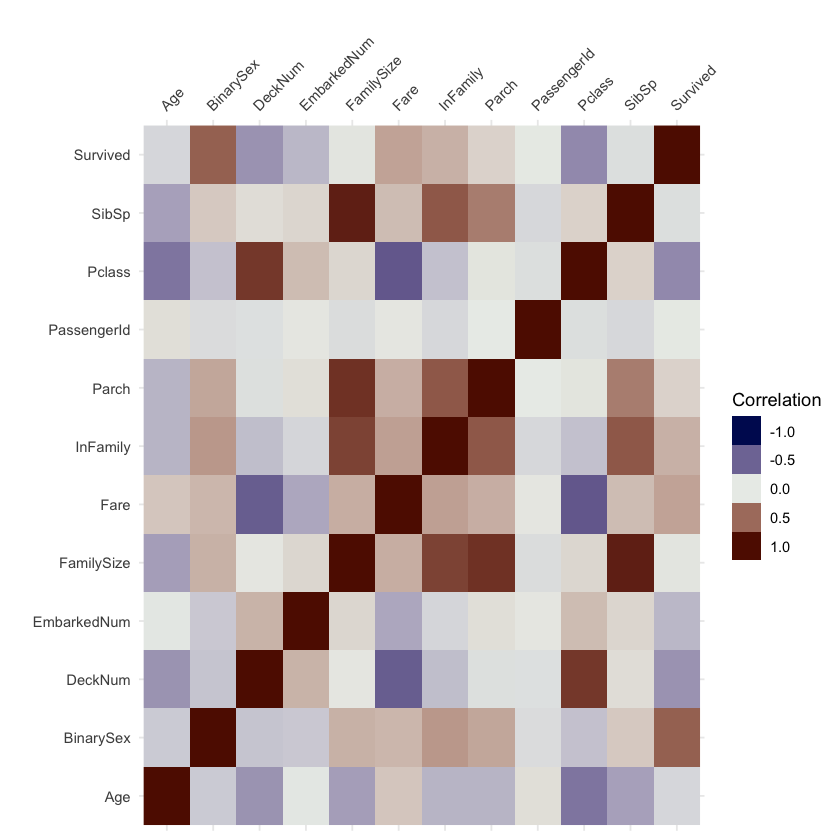

In [40]:
comb_num <- t.combined[sapply(t.combined,is.numeric)]
vis_cor(comb_num, na_action = "complete.obs")
correlation_data_family <- data_vis_cor(comb_num, na_action = "complete.obs")
write.csv(correlation_data_family,"correlation_data_family.csv")

In reviewing the data, it appears that the family groupings will not be of much (any) use to determine the cabins missing, so we'll move on from it and hope that those values help us elsewhere. We'll proceed to try and input the missing decks with whatever their class was. A simple, yet brute approach.

### Back to the Decks

The mode might be the best option for this approach, given their strong correlations and the fact that Deck numbers is at its heart a categorical data, not of continuous values, it would make no sense to use mean and get a Decknum of 3.5 or median and catch by mistake and outlier in the data. Let's just go with the basics. People tend to group together with their peers. **Now, very important to remember that we need to exclude the value #9 as that is our value for UNKNOWN decks.**

In [41]:
deck_mode <- t.combined %>%
  filter(DeckNum != 9) %>% 
  group_by(Pclass) %>%
  summarise(ModeDeckNum = DeckNum[which.max(table(DeckNum))])
#check
table(deck_mode)

      ModeDeckNum
Pclass 2 6 7
     1 1 0 0
     2 0 1 0
     3 0 0 1

In [42]:
#Join back 
t.combined <- t.combined %>%
  left_join(deck_mode, by = "Pclass") %>%
  mutate(DeckNum = ifelse(is.na(DeckNum) | DeckNum == 9, ModeDeckNum, DeckNum)) %>%
  select(-ModeDeckNum)
#check...
table(t.combined$DeckNum)


  1   2   3   4   5   6   7   8 
 22 132  94  46  41 275 698   1 

In [43]:
#Worked, now let's transform those values again into our actual Deck Initials. We only want to replace our Deck "U"'s, short for Unknowns.
t.combined <- t.combined %>%
  mutate(Deck = ifelse(Deck == "U", 
                       case_when(
                         DeckNum == 1 ~ "A",
                         DeckNum == 2 ~ "B",
                         DeckNum == 3 ~ "C",
                         DeckNum == 4 ~ "D",
                         DeckNum == 5 ~ "E",
                         DeckNum == 6 ~ "F",
                         DeckNum == 7 ~ "G",
                         DeckNum == 8 ~ "T"
                       ), 
                       Deck))

#Check
table(t.combined$Deck)


  A   B   C   D   E   F   G   T 
 22 132  94  46  41 275 698   1 

It seems that this is where the end of our missing values adventure ends. Cabins are, of course still unknown, but at least we can inferr the most reasonably Deck they would be on based on the strongest correlation: Class. With a "complete" dataset we are closer to modeling our final test. And of course, given the emphasis that we are paying to Class and because apparently every single other model in this exercise has used it, we're gonna delve into another sociological and economical indicator: Titles.

## Feature Engineering
Here there is nothing else "missing" that we can reasonably find. So the next step is to create new things.

We create new features, **Title**, **IsAdult**, **TitleCat**, and groupings for **Age**, **Fare**, and **FamilySize**.


Is this person an adult? Remember, "Mothers and children first!".
We'll just say that anybody who's 18 or older is an adult, anybody younger, is not. Let's not complicate ourselves any further.
18's or higher are 1's, younger are 0's.

In [46]:
t.combined <- t.combined %>%
  mutate(IsAdult = ifelse(Age >= 18, 1, 0))
table(t.combined$IsAdult)
#Fine, let's get into the title issue now...


   0    1 
 154 1155 

We have absolutely paid no mind to names so far, notwithstanding, they're there, and they're in the format of Last Name, Title. Name (Family?), we just care about the titles, so let's just cut them.


In [53]:
t.combined$Title <- sub(".*, (.*?)\\..*", "\\1", t.combined$Name)
#Of course, as with everything, we need to convert them to groups, let's check what we got
table(t.combined$Title)



        Capt          Col          Don         Dona           Dr     Jonkheer 
           1            4            1            1            8            1 
        Lady        Major       Master         Miss         Mlle          Mme 
           1            2           61          260            2            1 
          Mr          Mrs           Ms          Rev          Sir the Countess 
         757          197            2            8            1            1 

Dr's, Lady's, Majors, Masters, Miss', Mlle, Mme, Mr, Mrs', Ms', Rev, Sir and random unique, military and nobility titles.
Categorize it via groupings, whatever makes it easier on our eyes. Mr is already a good enough descriptor title so no need to change it. Miss is generally an unmarried single woman. Mrs is a married woman (generally). All other groupings are self descriptve enough.

In [49]:
t.combined$TitleCat <- t.combined$Title
t.combined$TitleCat <- gsub("Mlle|Ms", "Miss", t.combined$TitleCat)
t.combined$TitleCat <- gsub("Mme", "Mrs", t.combined$TitleCat)
t.combined$TitleCat <- gsub("the Countess|Lady|Don|Dona", "Nobility", t.combined$TitleCat)
t.combined$TitleCat <- gsub("Dr|Rev|Sir|Jonkheer", "Unique", t.combined$TitleCat)
t.combined$TitleCat <- gsub("Major|Col|Capt", "Military", t.combined$TitleCat)
table(t.combined$TitleCat)


  Master Military     Miss       Mr      Mrs Nobility   Unique 
      61        7      264      757      198        4       18 

This was our last exploratory data analysis go, we have quantified in one or another sense pretty much anything there is to quantify regarding our data, so we can move on to the fun stuff. Feature Engineering and Modeling our... model.

First, models don't work with text like we do, they like simple numbers that represent relationships. That's where one-hot encoding comes to place.


Given the nature of the categories, I will proceed to encode the following variables: EmbarkedNum, TitleCat and DeckNum. Why? They do not imply anything by their numbering, all other numbered variables do, in some sense, or they are a binary numeric option. Higher is not better or viceversa.

In [50]:
t.combined <- dummy_cols(t.combined, select_columns = c("EmbarkedNum", "TitleCat", "DeckNum"))

Encoded, now we can do some groupings in Age, Fare and FamilySizes, all other variables are either descriptive enough or already encoded


Create the AgeGroup column by cutting the ages into slices from -inf to 8 and etc and label those slices via our definitions. 25 is where young adulthood ends as it's when your brain finishes developing. no excuses! 

In [51]:
t.combined$AgeGroup <- cut(t.combined$Age, breaks = c(-Inf, 8, 18, 25, 60, Inf), 
                           labels = c("Babies", "Children", "Young Adults", "Adult", "Senior"))
#Check what we have
table(t.combined$AgeGroup)


      Babies     Children Young Adults        Adult       Senior 
          72          121          458          625           33 

Now let's group Fare. Since we have proven time and time again that class played a factor, it seems natural to assume that Fare paid is similarly a class based distribution and should reflect it, so we'll cut it into 3 evenly populated groups that will reflect the classes.


In [52]:
t.combined$FareGroup <- cut(t.combined$Fare, 
                            breaks = quantile(t.combined$Fare, probs = seq(0, 1, by = 0.3333331)), 
                            include.lowest = TRUE, 
                            labels = c("Low Fare", "Medium Fare", "High Fare"))
#As always, check, check, check
table(t.combined$FareGroup)


   Low Fare Medium Fare   High Fare 
        455         428         426 

Finally, Family Size. It could appear redundant but I think it will provide us the last bit of insight needed to accommodate. People in groups act differently, my reasoning goes as follows. FamilySize 0 means they traveled alone, so their survival depended on "no one else" (Let's ignore all the million other correlations we've established previously for a sec), Family Size of 1-3 meant that they traveled with a number of people dependent on them that could be reasonably managed in a crisis, and family size of 4+ meant that they had a whole group in a huge crisis, which, one would reasonably assume, impacted heavily on their survival chances.


In [54]:
t.combined$FamilySizeGroup <- cut(t.combined$FamilySize, breaks = c(-Inf, 1, 3, Inf), 
                                  labels = c("No Family", "Small Family", "Large Family"))
#Check
table(t.combined$FamilySizeGroup)


   No Family Small Family Large Family 
        1025          202           82 

Now we have done it, we're ready to go ahead and run our model, first let's split our models. Remember we created the DS column to specify which set was it.


In [55]:
t.train <- t.combined %>% filter(DS == "TRAIN") %>% select(-DS)
t.test <- t.combined %>% filter(DS == "TEST") %>% select(-DS)
#don't forget to delete the SURVIVE column from the test dataset, it didn't have it and we added it!
t.test <- t.test %>% select(-Survived)

## Time for Modeling

According to Google, dummie's (me) first machine learning model for binary outputs should be **logistic regression**. Either you survive, or you didn't. We're not quantifying whether you've been traumatized by a loved one you've failed to save on your big non-buoyant door.

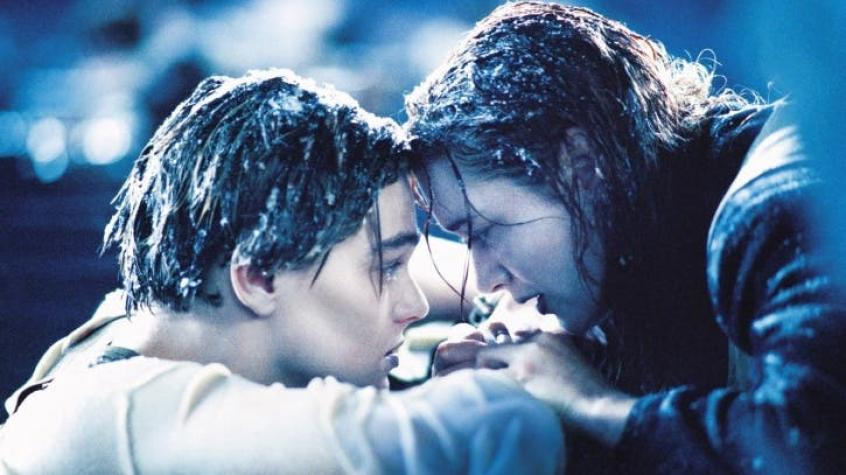

These models already exist in **R**. We'll just specify what it should be looking for.

**Survived** is our goal variable, so we're telling the model: *Review Survival* and use these ~ variables to figure out how they're weighing in on whether Survived is 1 or 0. **Binomial** is telling the model that our goal is indeed either 1 or 0. **Logit** is just the name of the processing, which uses logarithmic equations.

For ease of access, I'll save our variables here:

`Survived ~ Pclass + BinarySex + AgeGroup + FareGroup + FamilySizeGroup + EmbarkedNum + TitleCat + DeckNum`


### LogR?

In [56]:
LogRmodel <- glm(Survived ~ Pclass + BinarySex + AgeGroup + FareGroup + FamilySizeGroup + EmbarkedNum + TitleCat + DeckNum, 
             data = t.train, 
             family = binomial(link = "logit"))

Having built our model, now we make it pump the numbers.
predict uses our model on the data we specify and gives us a probability that each passenger survived.

In [57]:
predictions_train_LogRmodel <- predict(LogRmodel, newdata = t.train, type = "response")

This is just a bunch of percentages at this point.
If we use summary(), we can see that the median and mean are 0.21 and 0.38 (percent), which means most people probably did not survive, oops!

But again, we're not "measuring" it — you gotta call it.

In [58]:
callit_survived_train_LogRmodel <- ifelse(predictions_train_LogRmodel > 0.5, 1, 0)

1, survived, 0, did not survive.


Let's measure how accurate it was, we use mean since r will compare both values and tell us if we got it right (true) or not (false), and then divide it into our totals, which will become our accuracy. It's basically a vector of logical statements. Funky, but it will do.

In [59]:
accuracy_train_logRmodel <- mean(callit_survived_train_LogRmodel == t.train$Survived)
print(paste("Training Accuracy of LogR model:", accuracy_train_logRmodel))

[1] "Training Accuracy of LogR model: 0.832772166105499"


This is a great accuracy specially for our first time lol, not gonna lie, feeling very accomplished. 

What it means in practical terms is that we had a great eye for what variables were affecting the survivability of our passengers. 

And specially (it had me nervous) that the values we "eyeballed" for the missing data were possibly not too brute, we did a good job!


Of course, *thou shall not boast too soon*. Let's test on the test dataset

In [60]:
predictions_test_LogRmodel <- predict(LogRmodel, newdata = t.test, type = "response")
callit_survived_test_LogRmodel <- ifelse(predictions_test_LogRmodel > 0.5, 1, 0)
#No turning back now, let's format, send to Kaggle and see what we get back on accuracy...
#Format
submission <- data.frame(PassengerId = t.test$PassengerId, Survived = callit_survived_test_LogRmodel)
# Save the submission as a CSV file
write.csv(submission, file = "titanic_submissionLogR.csv", row.names = FALSE)

#### LogR Results

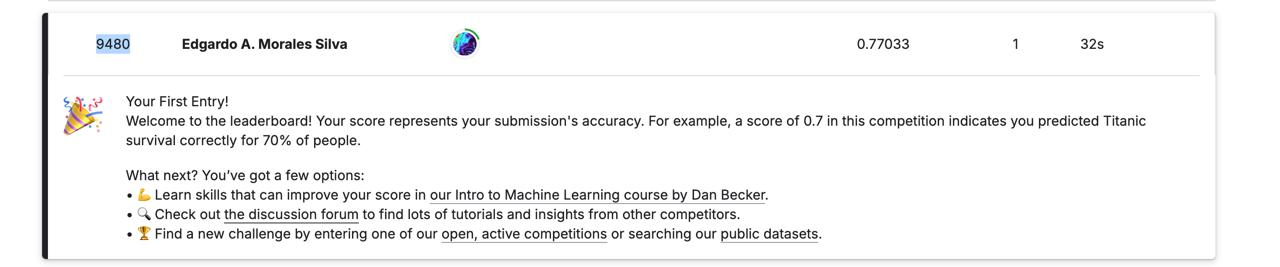

Score: 0.77033, LeaderboardPosition 9480. Not bad! A 6% difference between our train and the real test and first 10K positions, good! 

Let's try other models, peeking into some other solutions and the likes, people are using random forests, so let's give it a go.

### Random Forests?

Same variables, same data set, apparently and after trying it unsuccessfully, we cannot just send the data as is into our dataset, integers will make RandomForest go haywire, so we need to send Survival as a bunch of Factors. Better do it inside the function to avoid permanently altering our data.

In [63]:
RForestM <- randomForest(as.factor(Survived) ~ Pclass + BinarySex + AgeGroup + FareGroup + FamilySizeGroup + EmbarkedNum + TitleCat + DeckNum, 
                         data = t.train, 
                         ntree = 500)

500 trees, we can try with more or less but the internet seems to agree this is a reasonable amount of voting around


Random forest will just give us 0 or 1 directly, no need to convert the probability into a decision, we call it directly

In [64]:
#Test against the known data
callit_survived_train_RF <- predict(RForestM, newdata = t.train)
accuracy_train_RF <- mean(callit_survived_train_RF == t.train$Survived)
print(paste("Training Accuracy of RF model:", accuracy_train_RF))

[1] "Training Accuracy of RF model: 0.858585858585859"


2.5% percent better, not bad at all. This is with 500 trees. What about a 1000?


In [66]:
RForestM2 <- randomForest(as.factor(Survived) ~ Pclass + BinarySex + AgeGroup + FareGroup + FamilySizeGroup + EmbarkedNum + TitleCat + DeckNum, 
                         data = t.train, 
                         ntree = 1000)
callit_survived_train_RF2 <- predict(RForestM2, newdata = t.train)
accuracy_train_RF2 <- mean(callit_survived_train_RF2 == t.train$Survived)
print(paste("Training Accuracy of RF model with 1000 trees:", accuracy_train_RF2))

[1] "Training Accuracy of RF model with 1000 trees: 0.857463524130191"


Let's send them both to Kaggle, see how that works out for us.

In [67]:
callit_survived_test_RF <- predict(RForestM, newdata = t.test)
callit_survived_test_RF2 <- predict(RForestM2, newdata = t.test)
submissionRF <- data.frame(PassengerId = t.test$PassengerId, Survived = callit_survived_test_RF)
submissionRF2 <- data.frame(PassengerId = t.test$PassengerId, Survived = callit_survived_test_RF2)
write.csv(submissionRF, file = "titanic_submissionRF.csv", row.names = FALSE)
write.csv(submissionRF2, file = "titanic_submissionRF2.csv", row.names = FALSE)

#### Random Forest Results

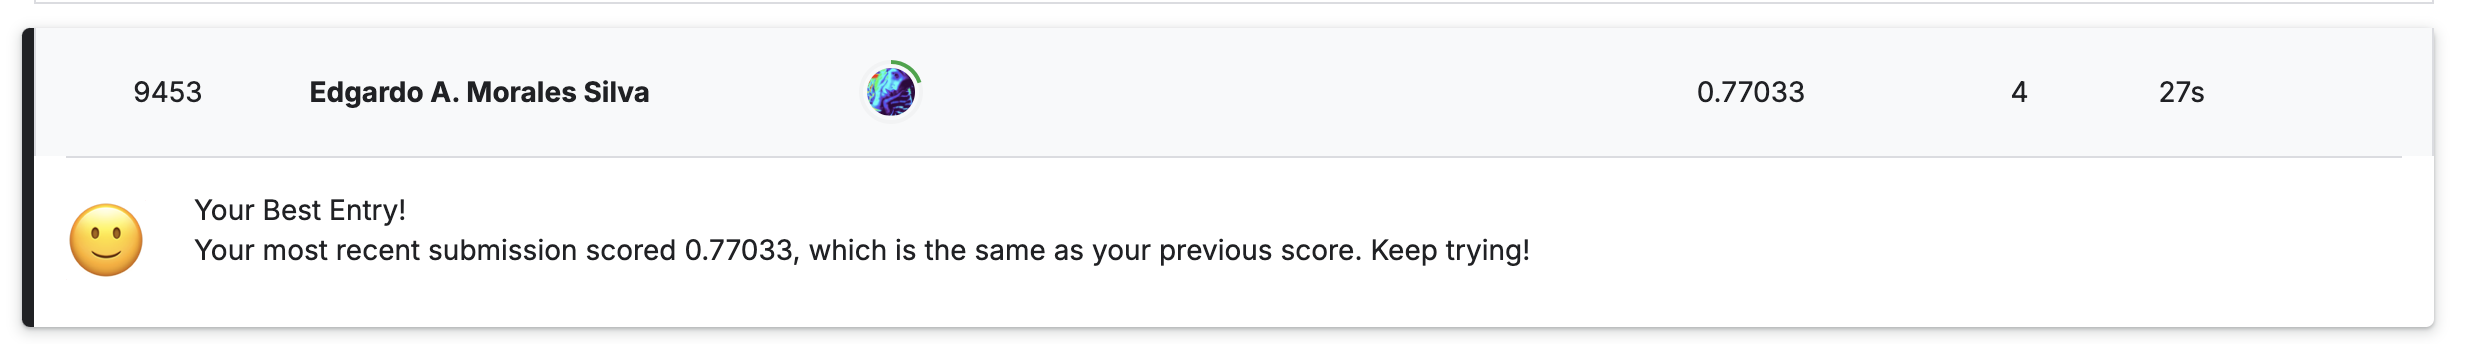
For 500 trees: No improvement.

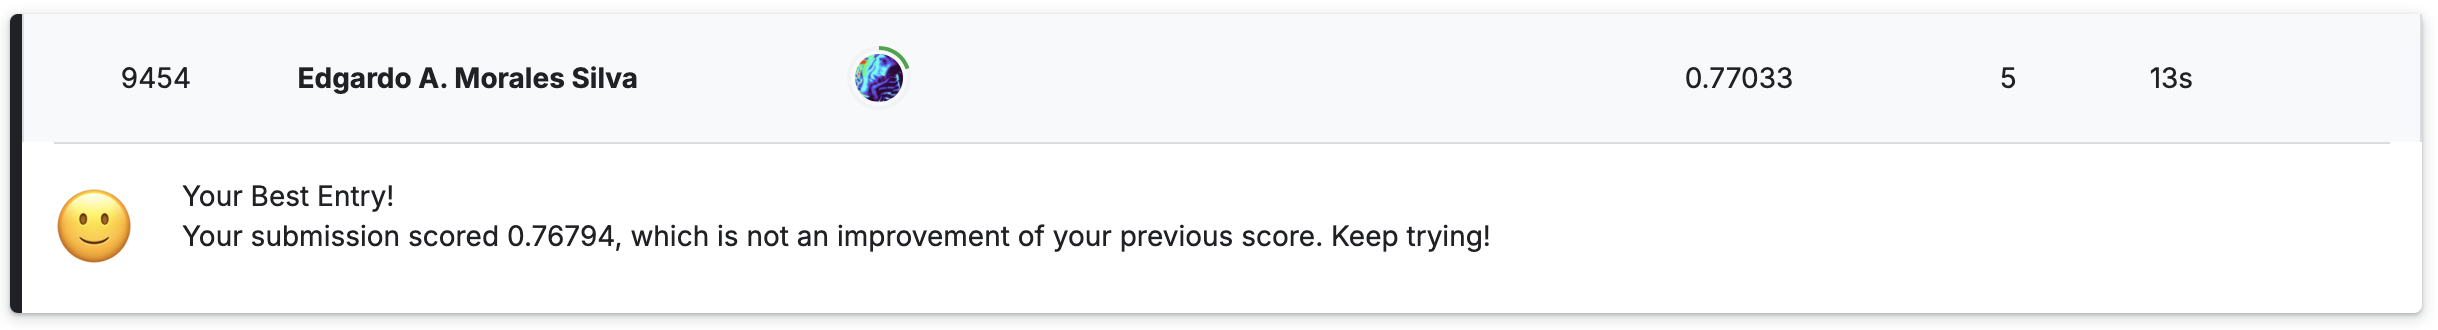
For 1000 trees: It did worse, lol!

### Conclusion

Our best modeling so far, then, has been LogR, we'll consider that the "good one" with a 77% accuracy for a first try building the model.


*This work has been considered finished on the scripting side as of Thu Sept 05 2024 00:50 AM UTC -06 Mexico City Time.*


Now all is there to do is work on the Junyper notebook. Easy, right?

*Editor's note:* It was not **that** hard...

### Thank you for your time.

I had a lot of fun with this challenge, it was my first time approaching and learning such tools, definitely excited me. And hopefully, it won't be my last Junyper Notebook evaluated by you. 

Hoping to heard good news soon,

*Edgardo Morales Silva*

In [72]:
#I had this song in my head while re-reading to make sure I did not miss anything so here you go lol
suppressMessages(install.packages("IRdisplay"))
suppressMessages(library(IRdisplay))
display_html('<iframe width="560" height="315" src="https://www.youtube.com/embed/CdqoNKCCt7A" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


The downloaded binary packages are in
	/var/folders/k1/mbnyb4r505q1r9njbg25wx9r0000gn/T//RtmpJByLbj/downloaded_packages
